This is the main notebook of this project

the main goal, to analyze the distribution of returns of the BTC/USDT pair.

In [1]:
import numpy as np
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt
from binance.client import Client

In [2]:
def get_data(api_key, api_secret, initial_date, final_date, pair, time_frame):
    
    '''Returns a DataFrame that contains all the information about the 
       historical price of a pair of cryptocurrencies '''
    
    client = Client(api_key, api_secret)
    klines = client.get_historical_klines(pair , time_frame, initial_date, final_date)
    information = np.array(klines, dtype=float)
    df = pd.DataFrame(information, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
             'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
             'Taker buy quote asset volume', 'Can be ignored'])
    df['Open time'] = pd.to_datetime(df['Open time'], utc=True, unit='ms')
    df['Close time'] = pd.to_datetime(df['Close time'], utc=True, unit='ms')
    #df.isnull().values.any()
    return df

def plot_figure(label1, label2):
    '''Graph labe1 as a function of label2'''
    plt.figure(figsize=(20,8))
    plt.grid(True)
    plt.plot(label1, label2)
    plt.xlabel(label1.name)
    plt.ylabel(label2.name)
    #plt.title('Close Prices 2017-12-01 and 2018-01-01')
    plt.show()

In [3]:
api_key = ''
api_secret = ''
initial_date ='1 Jan, 2020'
final_date ='30 jul, 2023'
pair = "BTCUSDT"
time_frame = Client.KLINE_INTERVAL_1HOUR

In [ ]:
data = get_data(api_key, api_secret, initial_date, final_date, pair, time_frame)
plot_figure(data['Open time'], data['Open'])

In [5]:
data = data.set_index("Open time")

In [6]:
data

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Can be ignored
Open time,,,,,,,,,,,
2020-01-01 00:00:00+00:00,7195.24,7196.25,7175.46,7177.02,511.814901,2020-01-01 00:59:59.999000064+00:00,3.675857e+06,7640.0,226.153126,1.624289e+06,0.0
2020-01-01 01:00:00+00:00,7176.47,7230.00,7175.71,7216.27,883.052603,2020-01-01 01:59:59.999000064+00:00,6.365953e+06,9033.0,570.721419,4.114804e+06,0.0
2020-01-01 02:00:00+00:00,7215.52,7244.87,7211.41,7242.85,655.156809,2020-01-01 02:59:59.999000064+00:00,4.736719e+06,7466.0,357.180263,2.582514e+06,0.0
2020-01-01 03:00:00+00:00,7242.66,7245.00,7220.00,7225.01,783.724867,2020-01-01 03:59:59.999000064+00:00,5.667367e+06,8337.0,394.810811,2.854987e+06,0.0
2020-01-01 04:00:00+00:00,7225.00,7230.00,7215.03,7217.27,467.812578,2020-01-01 04:59:59.999000064+00:00,3.379094e+06,5896.0,243.514706,1.759053e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04 05:00:00+00:00,31058.01,31090.90,30972.69,30972.70,1164.206490,2023-07-04 05:59:59.999000064+00:00,3.613346e+07,30625.0,461.226040,1.431449e+07,0.0
2023-07-04 06:00:00+00:00,30972.70,31052.91,30879.29,30999.55,2643.337180,2023-07-04 06:59:59.999000064+00:00,8.182761e+07,45930.0,946.104080,2.929606e+07,0.0
2023-07-04 07:00:00+00:00,30999.55,31032.35,30900.48,30911.41,942.333460,2023-07-04 07:59:59.999000064+00:00,2.918613e+07,25771.0,399.925660,1.238610e+07,0.0


In [7]:
minutesperhour, secondsperhour = 60, 3600

expected_alpha = 0.02

deltatimes = []
returns = []
numsamples = 1000
for i in range(numsamples):
    #print(i)
    sample_position = data.sample()
    time_indx, pric_init = sample_position['Open'].index[0], sample_position['Open'].item()
    for date, position in data.loc[time_indx:].iterrows():
        pric_finl = position['Open']
        alpha = pric_finl/pric_init - 1
        if alpha >= expected_alpha:
            deltatime = (date - time_indx).total_seconds()/secondsperhour
            deltatimes.append(deltatime)
            returns.append(alpha)
            break
    #print(deltatimes)
    #print(returns)

In [8]:
deltatimes, returns

([1.0,
  453.0,
  10.0,
  13.0,
  3.0,
  3124.0,
  78.0,
  29.0,
  173.0,
  339.0,
  16.0,
  3.0,
  15.0,
  32.0,
  1618.0,
  148.0,
  46.0,
  11.0,
  24.0,
  4.0,
  12.0,
  289.0,
  18.0,
  2.0,
  708.0,
  80.0,
  901.0,
  37.0,
  951.0,
  52.0,
  8.0,
  13.0,
  212.0,
  31.0,
  18.0,
  10.0,
  205.0,
  19.0,
  3.0,
  322.0,
  23.0,
  27.0,
  332.0,
  272.0,
  19.0,
  27.0,
  12.0,
  18.0,
  21.0,
  264.0,
  59.0,
  44.0,
  4.0,
  10.0,
  35.0,
  9.0,
  33.0,
  10.0,
  22.0,
  14.0,
  3.0,
  14.0,
  110.0,
  71.0,
  266.0,
  22.0,
  8.0,
  59.0,
  4.0,
  29.0,
  219.0,
  47.0,
  74.0,
  180.0,
  5.0,
  10.0,
  3.0,
  78.0,
  15.0,
  40.0,
  244.0,
  214.0,
  130.0,
  152.0,
  8.0,
  878.0,
  45.0,
  32.0,
  4.0,
  13.0,
  46.0,
  26.0,
  41.0,
  82.0,
  86.0,
  4.0,
  109.0,
  51.0,
  57.0,
  14.0,
  7390.0,
  6.0,
  39.0,
  56.0,
  20.0,
  6.0,
  87.0,
  159.0,
  1.0,
  46.0,
  248.0,
  10.0,
  3.0,
  86.0,
  163.0,
  10.0,
  98.0,
  11.0,
  103.0,
  15.0,
  24.0,
  18.0,
  459.0,
  

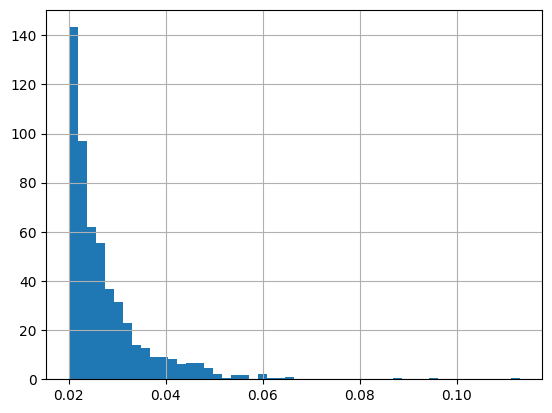

In [9]:
plt.hist(returns, bins=50, density=True)
#plt.xlim(0.005, 0.1)
plt.grid(True)

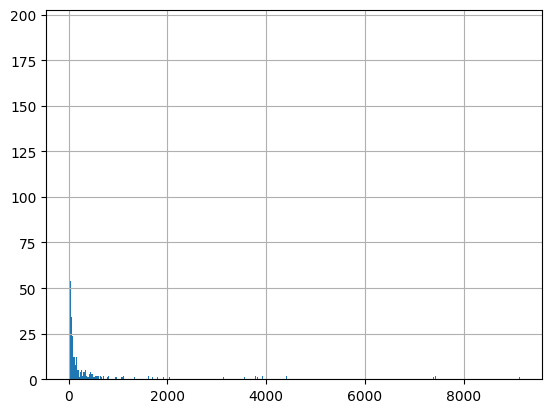

In [11]:
plt.hist(deltatimes, bins=1000)
#plt.xlim(0.0, 500)
plt.grid(True)

In [291]:
data = data.set_index("Open time")
secondsperhour = 3600
sample_position = data.sample()
time_indx, pric_init = sample_position['Open'].index[0], sample_position['Open'].item()

for date, position in data.loc[time_indx:].iterrows():
    pric_finl = position['Open']
    alpha = pric_finl/pric_init - 1
    #print(type((time_indx - date).total_seconds()/secondsperhour), type(pric_finl), type(pric_finl/pric_init - 1))
    print(((date - time_indx).total_seconds()/secondsperhour), pric_finl, alpha, f'%{100*(alpha)}')
    if alpha > 0.01: break
    sleep(1.0)

KeyError: "None of ['Open time'] are in the columns"